<a href="https://colab.research.google.com/github/wkabbani/pytorch-playground/blob/main/03_computerivision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

## 03.02. Data

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.ndim, image.shape

(3, torch.Size([1, 28, 28]))

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [10]:
train_data.targets.shape

torch.Size([60000])

In [11]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

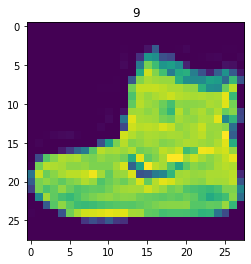

In [15]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

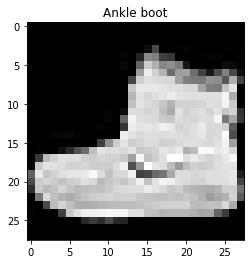

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])

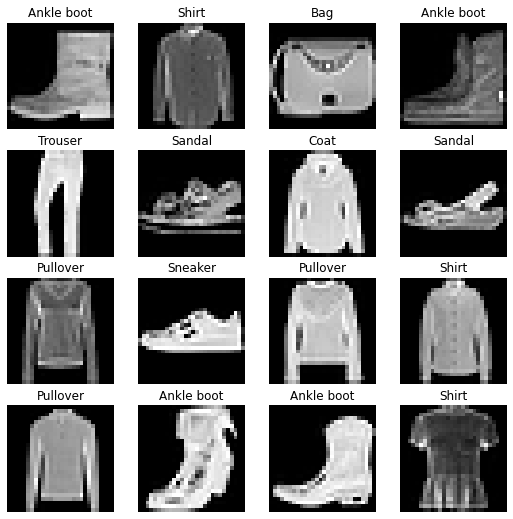

In [20]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False);

## 03.02. Data Loader

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dl = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True   
)

test_dl = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [23]:
# how many batches each loader has
len(train_dl), len(test_dl)

(1875, 313)

In [24]:
train_images_batch, train_labels_batch = next(iter(train_dl))
train_images_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


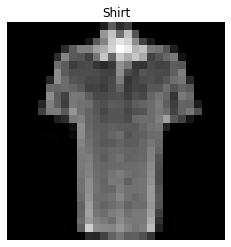

In [25]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_images_batch), size=[1]).item()
img, label = train_images_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 03.03. Baseline Model

In [26]:
# testing the flatten layer
flatten_model = nn.Flatten()

x = train_images_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [31]:
class FMnistModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.model(x)

In [32]:
torch.manual_seed(42)

modelv0 = FMnistModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=10
)
modelv0.to('cpu')

FMnistModelV0(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelv0.parameters(), lr=0.1)

In [35]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):

  # training
  train_loss = 0
  # put the model in train mode
  modelv0.train()

  for batch_train_data, batch_train_labels in train_dl:
    
    # forward pass
    preds = modelv0(batch_train_data)

    # loss
    loss = loss_fn(preds, batch_train_labels)
    train_loss += loss

    # reset grads
    optimizer.zero_grad()

    # calculate new grads
    loss.backward()

    # update the parameters
    optimizer.step()

  # avg loss per minibatch
  train_loss /= len(train_dl)

  # testing
  test_loss, test_acc = 0, 0

  # put the model in eval mode
  modelv0.eval()

  with torch.inference_mode():

    for batch_test_data, batch_test_labels in test_dl:
      # forward pass
      tpreds = modelv0(batch_test_data)
      # test loss
      tloss = loss_fn(tpreds, batch_test_labels)
      test_loss += tloss
      # test acc
      test_acc += accuracy_fn(y_true=batch_test_labels, y_pred=tpreds.argmax(dim=1))

    # avg loss per minibatch
    test_loss /= len(test_dl)

    # avg acc per minibatch
    test_acc /= len(test_dl)

  print(f'Epoch: {epoch}, Train loss: {train_loss:.5f}, Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0, Train loss: 0.59039, Test loss: 0.50954, Test acc: 82.04
Epoch: 1, Train loss: 0.47633, Test loss: 0.47989, Test acc: 83.20
Epoch: 2, Train loss: 0.45503, Test loss: 0.47664, Test acc: 83.43


In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
  
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=modelv0, 
    data_loader=test_dl,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}